In [1]:
import os

In [351]:
import numpy as np
import pandas as pd
from scipy import stats

In [352]:
import collections

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [207]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
os.getcwd()

'C:\\Users\\yafeizhang\\OneDrive - hkaift\\AIFT_project\\3.2\\Code'

In [4]:
data_folder = '../Data'

---

### <div class='alert alert-block alert-info'>Load Data</div>

#### Trade data

In [157]:
file_path = os.path.join('../Data', '2020_trade.csv')
trade_df = pd.read_csv(file_path)
trade_df.shape

(240, 22)

In [158]:
trade_df.head()

,time,country,Australia,Brunei,Canada,Chile,China,Hong Kong,India,Japan,Malaysia,Mexico,New Zealand,Peru,Philippines,Russia,Singapore,South Korea,Taiwan,Thailand,United States,Vietnam
0,202001,Australia,0,112693727,151901655,50391055,5131578978,33385008,-1,266058944,1057363029,-1,655415981,165036133,377296890,7946677,34996437,7400930,689804819,657345705,2022660243,414636995
1,202001,Brunei,4660659,0,585037,164922,91762973,3871792,-1,11514377,8002291,-1,55348052,607196,120030,559,586835,22660642,66305831,8233675,24810504,4110155
2,202001,Canada,163470363,784,0,144188403,4262218017,19567055,-1,104105504,921037202,-1,168080038,1970897208,44643205,270124036,86158493,61331701,93482192,206100362,17871255455,456148979
3,202001,Chile,34101539,57,49172180,0,1463744640,5083320,-1,12721605,153796768,-1,17303211,141463300,11155133,132594799,5560870,5130111,5535891,48087182,1176617729,70915221
4,202001,China,11084077793,184198617,1501681811,3050176502,0,583639092,-1,3184440625,10184892856,-1,5617160977,1207305509,1371802286,1368309115,1200317685,6111417445,2844987284,3040048110,9068409030,4763354344


In [159]:
17 * 12

204

In [160]:
time = 202001

trade_df[trade_df['time']==time]

,time,country,Australia,Brunei,Canada,Chile,China,Hong Kong,India,Japan,Malaysia,Mexico,New Zealand,Peru,Philippines,Russia,Singapore,South Korea,Taiwan,Thailand,United States,Vietnam
0,202001,Australia,0,112693727,151901655,50391055,5131578978,33385008,-1,266058944,1057363029,-1,655415981,165036133,377296890,7946677,34996437,7400930,689804819,657345705,2022660243,414636995
1,202001,Brunei,4660659,0,585037,164922,91762973,3871792,-1,11514377,8002291,-1,55348052,607196,120030,559,586835,22660642,66305831,8233675,24810504,4110155
2,202001,Canada,163470363,784,0,144188403,4262218017,19567055,-1,104105504,921037202,-1,168080038,1970897208,44643205,270124036,86158493,61331701,93482192,206100362,17871255455,456148979
3,202001,Chile,34101539,57,49172180,0,1463744640,5083320,-1,12721605,153796768,-1,17303211,141463300,11155133,132594799,5560870,5130111,5535891,48087182,1176617729,70915221
4,202001,China,11084077793,184198617,1501681811,3050176502,0,583639092,-1,3184440625,10184892856,-1,5617160977,1207305509,1371802286,1368309115,1200317685,6111417445,2844987284,3040048110,9068409030,4763354344
5,202001,Hong Kong,569756374,183040,90444420,677531704,17343912989,0,-1,194873538,2168223986,-1,1591886695,105165653,50957357,18239371,683650884,22564354,3097802050,639479529,1756829031,659456375
6,202001,India,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,202001,Japan,381993514,20966830,159874448,9479690,3997609566,267774993,-1,0,1096431146,-1,645189792,22990698,44843972,7332404,61915865,139796505,1441381477,638167099,635066163,347642870
8,202001,Malaysia,3548702857,268518662,806883571,546680921,15899128323,98144994,-1,1503641923,0,-1,1751935538,505323703,172219267,144211402,796430713,964638060,744947854,1965177860,6386209340,2135843416
9,202001,Mexico,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [169]:
9068409030

34882851376

9068409030

In [161]:
month = 202001
month_trade_df = trade_df[trade_df['time']==month]

In [162]:
month_trade_df

,time,country,Australia,Brunei,Canada,Chile,China,Hong Kong,India,Japan,Malaysia,Mexico,New Zealand,Peru,Philippines,Russia,Singapore,South Korea,Taiwan,Thailand,United States,Vietnam
0,202001,Australia,0,112693727,151901655,50391055,5131578978,33385008,-1,266058944,1057363029,-1,655415981,165036133,377296890,7946677,34996437,7400930,689804819,657345705,2022660243,414636995
1,202001,Brunei,4660659,0,585037,164922,91762973,3871792,-1,11514377,8002291,-1,55348052,607196,120030,559,586835,22660642,66305831,8233675,24810504,4110155
2,202001,Canada,163470363,784,0,144188403,4262218017,19567055,-1,104105504,921037202,-1,168080038,1970897208,44643205,270124036,86158493,61331701,93482192,206100362,17871255455,456148979
3,202001,Chile,34101539,57,49172180,0,1463744640,5083320,-1,12721605,153796768,-1,17303211,141463300,11155133,132594799,5560870,5130111,5535891,48087182,1176617729,70915221
4,202001,China,11084077793,184198617,1501681811,3050176502,0,583639092,-1,3184440625,10184892856,-1,5617160977,1207305509,1371802286,1368309115,1200317685,6111417445,2844987284,3040048110,9068409030,4763354344
5,202001,Hong Kong,569756374,183040,90444420,677531704,17343912989,0,-1,194873538,2168223986,-1,1591886695,105165653,50957357,18239371,683650884,22564354,3097802050,639479529,1756829031,659456375
6,202001,India,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,202001,Japan,381993514,20966830,159874448,9479690,3997609566,267774993,-1,0,1096431146,-1,645189792,22990698,44843972,7332404,61915865,139796505,1441381477,638167099,635066163,347642870
8,202001,Malaysia,3548702857,268518662,806883571,546680921,15899128323,98144994,-1,1503641923,0,-1,1751935538,505323703,172219267,144211402,796430713,964638060,744947854,1965177860,6386209340,2135843416
9,202001,Mexico,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [171]:
trade_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'import_from', 0:'value'})

,time,country,import_from,value
0,202001,Australia,Australia,0
1,202001,Australia,Brunei,112693727
2,202001,Australia,Canada,151901655
3,202001,Australia,Chile,50391055
4,202001,Australia,China,5131578978
...,...,...,...,...
4795,202012,Vietnam,South Korea,234763260
4796,202012,Vietnam,Taiwan,330837048
4797,202012,Vietnam,Thailand,1245231267
4798,202012,Vietnam,United States,1277229257


In [172]:
month_trade_df.shape

(20, 22)

In [174]:
# month_trade_df.set_index('country')

In [175]:
month_trade_df['country'].tolist()

['Australia',
 'Brunei',
 'Canada',
 'Chile',
 'China',
 'Hong Kong',
 'India',
 'Japan',
 'Malaysia',
 'Mexico',
 'New Zealand',
 'Peru',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Taiwan',
 'Thailand',
 'United States',
 'Vietnam']

In [75]:
plot_df

,Australia,Brunei Darussalam,Canada,Chile,China,"China, Hong Kong SAR",Indonesia,Japan,Malaysia,Mexico,New Zealand,Peru,Philippines,Singapore,Thailand,United States of America,Viet Nam
0,0,112693727,151901655,50391055,5131578978,33385008,266058944,1057363029,655415981,165036133,377296890,7946677,34996437,689804819,657345705,2022660243,414636995
1,4660659,0,585037,164922,91762973,3871792,11514377,8002291,55348052,607196,120030,559,586835,66305831,8233675,24810504,4110155
2,163470363,784,0,144188403,4262218017,19567055,104105504,921037202,168080038,1970897208,44643205,270124036,86158493,93482192,206100362,17871255455,456148979
3,34101539,57,49172180,0,1463744640,5083320,12721605,153796768,17303211,141463300,11155133,132594799,5560870,5535891,48087182,1176617729,70915221
4,11084077793,184198617,1501681811,3050176502,0,583639092,3184440625,10184892856,5617160977,1207305509,1371802286,1368309115,1200317685,2844987284,3040048110,9068409030,4763354344
5,569756374,183040,90444420,677531704,17343912989,0,194873538,2168223986,1591886695,105165653,50957357,18239371,683650884,3097802050,639479529,1756829031,659456375
6,381993514,20966830,159874448,9479690,3997609566,267774993,0,1096431146,645189792,22990698,44843972,7332404,61915865,1441381477,638167099,635066163,347642870
7,3548702857,268518662,806883571,546680921,15899128323,98144994,1503641923,0,1751935538,505323703,172219267,144211402,796430713,744947854,1965177860,6386209340,2135843416
8,529781691,40641451,69362088,4615835,3932682055,293853555,783820789,1139986307,0,35632485,57103608,30285444,181403448,1847244586,706076213,1646872238,353889363
9,25929227,0,775896403,110442941,6939862340,29667046,137588885,1395476175,1006592722,0,16914424,58038974,233263289,132076257,498142484,16206124034,546767139


In [177]:
month_trade_df

,time,country,Australia,Brunei,Canada,Chile,China,Hong Kong,India,Japan,Malaysia,Mexico,New Zealand,Peru,Philippines,Russia,Singapore,South Korea,Taiwan,Thailand,United States,Vietnam
0,202001,Australia,0,112693727,151901655,50391055,5131578978,33385008,-1,266058944,1057363029,-1,655415981,165036133,377296890,7946677,34996437,7400930,689804819,657345705,2022660243,414636995
1,202001,Brunei,4660659,0,585037,164922,91762973,3871792,-1,11514377,8002291,-1,55348052,607196,120030,559,586835,22660642,66305831,8233675,24810504,4110155
2,202001,Canada,163470363,784,0,144188403,4262218017,19567055,-1,104105504,921037202,-1,168080038,1970897208,44643205,270124036,86158493,61331701,93482192,206100362,17871255455,456148979
3,202001,Chile,34101539,57,49172180,0,1463744640,5083320,-1,12721605,153796768,-1,17303211,141463300,11155133,132594799,5560870,5130111,5535891,48087182,1176617729,70915221
4,202001,China,11084077793,184198617,1501681811,3050176502,0,583639092,-1,3184440625,10184892856,-1,5617160977,1207305509,1371802286,1368309115,1200317685,6111417445,2844987284,3040048110,9068409030,4763354344
5,202001,Hong Kong,569756374,183040,90444420,677531704,17343912989,0,-1,194873538,2168223986,-1,1591886695,105165653,50957357,18239371,683650884,22564354,3097802050,639479529,1756829031,659456375
6,202001,India,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,202001,Japan,381993514,20966830,159874448,9479690,3997609566,267774993,-1,0,1096431146,-1,645189792,22990698,44843972,7332404,61915865,139796505,1441381477,638167099,635066163,347642870
8,202001,Malaysia,3548702857,268518662,806883571,546680921,15899128323,98144994,-1,1503641923,0,-1,1751935538,505323703,172219267,144211402,796430713,964638060,744947854,1965177860,6386209340,2135843416
9,202001,Mexico,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


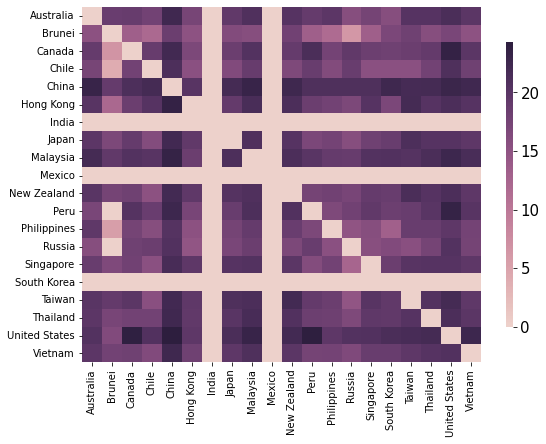

In [179]:
plot_df = month_trade_df.iloc[0:, 2:]

plot_df.replace(-1, 0, inplace=True)
plot_df.index = plot_df.columns
plot_df = np.log(plot_df+1)

# fig, ax = plt.subplots(figsize=(12, 10))
fig, ax = plt.subplots(figsize=(8, 6))
# fig = plt.figure(figsize=(12, 10))

ax = sns.heatmap(plot_df, 
#                  cmap="Purples",
#                  cmap="Reds",
                 cmap=sns.cubehelix_palette(as_cmap=True),
#                  linewidths=.0001,
#                  cbar=False,
                 cbar_kws={"shrink": .8, 
                           'aspect': 40,
#                            'ticks': range(11),
#                            'use_gridspec': False,
#                            'location': 'bottom',
#                            'label': 'My colorbar', 
#                            'orientation': 'horizontal'
                          },
                )

cbar = ax.collections[0].colorbar
# here set the labelsize
cbar.ax.tick_params(labelsize=15)



# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))


# ax.set_xlabel('')
# ax.set_xticklabels([])

# ax.set_ylabel('')
# ax.set_yticklabels(todo_cities_en[:tmp.shape[0]])

# city as label
# ticks = [i+0.5 for i in range(len(tmp))]
# plt.yticks(ticks, todo_cities_en[:len(tmp)], rotation='0')
# plt.xticks(ticks, todo_cities_en[:len(tmp)], rotation='90')

# province as label
# ticks = [i+0.5 for i in province_label_loc.values]
# plt.yticks(ticks, province_label_loc.index, rotation='0')
# plt.xticks(ticks, province_label_loc.index, rotation='90')


# ax.xaxis.set_ticks_position('top') # the rest is the same
# plt.xticks(rotation = 45)    # Rotates X-Axis Ticks by 45-degrees

# ax.set_xticklabels(ax.get_xticks(), rotation = 45)


text_color = '#46ac88'
# text_color = 'k'

# ax.set_axis_off()


plt.tight_layout(pad=0.1)

# out_dir = 'Baidu_Qianxi/Results/figures'
# plt.savefig(os.path.join(out_dir, 'flow_matrix-20200101-0123-province-labelled.pdf'), pad_inches=0, bbox_inches='tight')
# fig.savefig('myimage.svg', format='svg', dpi=1200)

# plt.show()

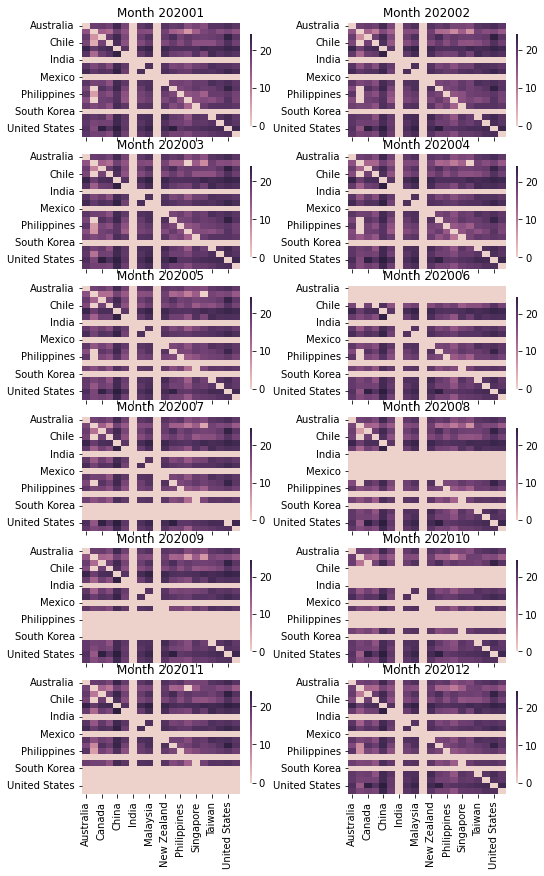

In [188]:

fig, axs = plt.subplots(6, 2, 
                        figsize=(7.5, 6*2), 
                        sharex=True,  
#                         gridspec_kw={"height_ratios":[2, 2]}
                       )

# Remove horizontal space between axes
# fig.subplots_adjust(hspace=0)


for i in range(1, 13):

    month = 202000 + i

    month_trade_df = trade_df[trade_df['time']==month]

    plot_df = month_trade_df.iloc[0:, 2:]
    plot_df.index = plot_df.columns
    
    plot_df.replace(-1, 0, inplace=True)
    
    # log-transformation
    plot_df = np.log(plot_df+1)

    # fig, ax = plt.subplots(figsize=(12, 10))
    # fig, ax = plt.subplots(figsize=(8, 6))
    # fig = plt.figure(figsize=(12, 10))

    ax = axs.flatten()[i-1]
    
    sns.heatmap(plot_df, 
                ax=axs.flatten()[i-1],
    #                  cmap="Purples",
    #                  cmap="Reds",
                     cmap=sns.cubehelix_palette(as_cmap=True),
    #                  linewidths=.0001,
    #                  cbar=False,
                     cbar_kws={"shrink": .8, 
                               'aspect': 40,
    #                            'ticks': range(11),
    #                            'use_gridspec': False,
    #                            'location': 'bottom',
    #                            'label': 'My colorbar', 
    #                            'orientation': 'horizontal'
                              },
                    )
    
#     ax.set_ylabel(f'Month {month}')
    ax.set_title(f'Month {month}')

    

#     cbar = ax.collections[0].colorbar
#     # here set the labelsize
#     cbar.ax.tick_params(labelsize=15)



plt.tight_layout(pad=0.1)

# out_dir = 'Baidu_Qianxi/Results/figures'
# plt.savefig(os.path.join(out_dir, 'flow_matrix-20200101-0123-province-labelled.pdf'), pad_inches=0, bbox_inches='tight')
# fig.savefig('myimage.svg', format='svg', dpi=1200)

# plt.show()

#### Correlation

In [189]:
file_path = os.path.join('../Data', '2020_trade.csv')
trade_df = pd.read_csv(file_path)
trade_df.shape

(240, 22)

In [191]:
trade_sdf = trade_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'import_from', 0:'trade'})
trade_sdf.head()

,time,country,import_from,trade
0,202001,Australia,Australia,0
1,202001,Australia,Brunei,112693727
2,202001,Australia,Canada,151901655
3,202001,Australia,Chile,50391055
4,202001,Australia,China,5131578978


In [192]:
file_path = os.path.join('../Data', '2020_mention.csv')
mention_df = pd.read_csv(file_path)
mention_df.shape

(240, 22)

In [213]:
mention_sdf = mention_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'mentioned', 0:'mention'})
print(mention_sdf.shape)
mention_sdf.head()

(4800, 4)


,time,country,mentioned,mention
0,202001,Australia,Australia,79981
1,202001,Australia,Brunei,3
2,202001,Australia,Canada,1294
3,202001,Australia,Chile,425
4,202001,Australia,China,6817


In [197]:
file_path = os.path.join('../Data', '2020_2mentions.csv')
mention2_df = pd.read_csv(file_path)
mention2_df.shape

(240, 22)

In [198]:
mention2_sdf = mention2_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'co_mentioned', 0:'co_mention'})
mention2_sdf.head()

,time,country,co_mentioned,co_mention
0,202001,Australia,Australia,135151
1,202001,Australia,Brunei,27
2,202001,Australia,Canada,2145
3,202001,Australia,Chile,628
4,202001,Australia,China,5129


In [216]:
df = pd.merge(trade_sdf, mention_sdf, left_on=['time', 'country', 'import_from'], right_on=['time', 'country', 'mentioned'])
df.head()

,time,country,import_from,trade,mentioned,mention
0,202001,Australia,Australia,0,Australia,79981
1,202001,Australia,Brunei,112693727,Brunei,3
2,202001,Australia,Canada,151901655,Canada,1294
3,202001,Australia,Chile,50391055,Chile,425
4,202001,Australia,China,5131578978,China,6817


In [215]:
df[df['country']=='Australia']

,time,country,import_from,trade,mentioned,mention
0,202001,Australia,Australia,0,Australia,79981
1,202001,Australia,Brunei,112693727,Brunei,3
2,202001,Australia,Canada,151901655,Canada,1294
3,202001,Australia,Chile,50391055,Chile,425
4,202001,Australia,China,5131578978,China,6817
5,202001,Australia,Hong Kong,33385008,Hong Kong,62
6,202001,Australia,India,-1,India,425
7,202001,Australia,Japan,266058944,Japan,2159
8,202001,Australia,Malaysia,1057363029,Malaysia,219
9,202001,Australia,Mexico,-1,Mexico,524


In [217]:
df.shape

(4800, 6)

In [218]:
df = pd.merge(df, mention2_sdf, left_on=['time', 'country', 'import_from'], right_on=['time', 'country', 'co_mentioned'])
df.head()

,time,country,import_from,trade,mentioned,mention,co_mentioned,co_mention
0,202001,Australia,Australia,0,Australia,79981,Australia,135151
1,202001,Australia,Brunei,112693727,Brunei,3,Brunei,27
2,202001,Australia,Canada,151901655,Canada,1294,Canada,2145
3,202001,Australia,Chile,50391055,Chile,425,Chile,628
4,202001,Australia,China,5131578978,China,6817,China,5129


In [219]:
df[df['country']=='Canada']

,time,country,import_from,trade,mentioned,mention,co_mentioned,co_mention
40,202001,Canada,Australia,163470363,Australia,4179,Australia,2145
41,202001,Canada,Brunei,784,Brunei,0,Brunei,1
42,202001,Canada,Canada,0,Canada,119112,Canada,121473
43,202001,Canada,Chile,144188403,Chile,586,Chile,289
44,202001,Canada,China,4262218017,China,9016,China,5810
45,202001,Canada,Hong Kong,19567055,Hong Kong,72,Hong Kong,60
46,202001,Canada,India,-1,India,313,India,222
47,202001,Canada,Japan,104105504,Japan,2401,Japan,2021
48,202001,Canada,Malaysia,921037202,Malaysia,292,Malaysia,106
49,202001,Canada,Mexico,-1,Mexico,1765,Mexico,1385


In [220]:
df.head()

,time,country,import_from,trade,mentioned,mention,co_mentioned,co_mention
0,202001,Australia,Australia,0,Australia,79981,Australia,135151
1,202001,Australia,Brunei,112693727,Brunei,3,Brunei,27
2,202001,Australia,Canada,151901655,Canada,1294,Canada,2145
3,202001,Australia,Chile,50391055,Chile,425,Chile,628
4,202001,Australia,China,5131578978,China,6817,China,5129


In [229]:
filter_df = df[ (df['trade']>0) & (df['mention']>0) & (df['co_mention']>0) ]
filter_df.shape

(2821, 8)

In [230]:
cols = ['trade', 'mention', 'co_mention']
filter_df[cols].corr()

,trade,mention,co_mention
trade,1.000000,0.470734,0.501228
mention,0.470734,1.000000,0.830529
co_mention,0.501228,0.830529,1.000000


In [264]:
filter_df[cols].corr(method='spearman')

,trade,mention,co_mention
trade,1.000000,0.547659,0.523391
mention,0.547659,1.000000,0.837090
co_mention,0.523391,0.837090,1.000000


In [233]:
filter_df.sample(10)

,time,country,import_from,trade,mentioned,mention,co_mentioned,co_mention
2243,202006,Philippines,Chile,8745106,Chile,96,Chile,31
1832,202005,Peru,Philippines,33471638,Philippines,15,Philippines,38
739,202002,Taiwan,Vietnam,410709784,Vietnam,2453,Vietnam,1129
943,202003,Japan,Chile,5905541,Chile,91,Chile,405
667,202002,Russia,Japan,20440285,Japan,2960,Japan,4345
2507,202007,Hong Kong,Japan,151962276,Japan,371,Japan,412
2607,202007,New Zealand,Japan,699063920,Japan,384,Japan,916
1673,202005,Chile,Russia,63506846,Russia,253,Russia,3659
254,202001,Philippines,Singapore,6903332,Singapore,71,Singapore,117
2684,202007,Singapore,China,2054535211,China,1361,China,1725


---

#### Correlation with delay


In [391]:
file_path = os.path.join('../Data', '2020_trade.csv')

# file_path = os.path.join('../Data', '201502_202005_trade.csv')

trade_df = pd.read_csv(file_path)
trade_df.shape

(240, 22)

In [392]:
trade_sdf = trade_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'import_from', 0:'trade'})
trade_sdf.head()

,time,country,import_from,trade
0,202001,Australia,Australia,0
1,202001,Australia,Brunei,112693727
2,202001,Australia,Canada,151901655
3,202001,Australia,Chile,50391055
4,202001,Australia,China,5131578978


In [393]:
file_path = os.path.join('../Data', '2020_mention.csv')

# file_path = os.path.join('../Data', '201502_202105_mention.csv')

mention_df = pd.read_csv(file_path)
mention_df.shape

(240, 22)

In [394]:
mention_sdf = mention_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'mentioned', 0:'mention'})
print(mention_sdf.shape)
mention_sdf.head()

(4800, 4)


,time,country,mentioned,mention
0,202001,Australia,Australia,79981
1,202001,Australia,Brunei,3
2,202001,Australia,Canada,1294
3,202001,Australia,Chile,425
4,202001,Australia,China,6817


In [396]:
file_path = os.path.join('../Data', '2020_2mentions.csv')

# file_path = os.path.join('../Data', '201502_202005_2mentions.csv')

mention2_df = pd.read_csv(file_path)
mention2_df.shape


mention2_sdf = mention2_df.set_index(['time', 'country']).stack().reset_index().rename(columns={'level_2': 'co_mentioned', 0:'co_mention'})
mention2_sdf.head()

,time,country,co_mentioned,co_mention
0,202001,Australia,Australia,135151
1,202001,Australia,Brunei,27
2,202001,Australia,Canada,2145
3,202001,Australia,Chile,628
4,202001,Australia,China,5129


In [402]:
delta = 0

trade_sdf['pre_time'] = trade_sdf['time'] - delta

In [403]:
trade_sdf.head()

,time,country,import_from,trade,pre_time
0,202001,Australia,Australia,0,202001
1,202001,Australia,Brunei,112693727,202001
2,202001,Australia,Canada,151901655,202001
3,202001,Australia,Chile,50391055,202001
4,202001,Australia,China,5131578978,202001


In [404]:
df = pd.merge(trade_sdf, mention_sdf, left_on=['pre_time', 'country', 'import_from'], right_on=['time', 'country', 'mentioned'])
df = pd.merge(df, mention2_sdf, left_on=['pre_time', 'country', 'import_from'], right_on=['time', 'country', 'co_mentioned'])
df.rename(columns={'time_x': 'trade_time','time_y': 'mention_time', 'time': 'co_mention_time'}, inplace=True)
df.head()

,trade_time,country,import_from,trade,pre_time,mention_time,mentioned,mention,co_mention_time,co_mentioned,co_mention
0,202001,Australia,Australia,0,202001,202001,Australia,79981,202001,Australia,135151
1,202001,Australia,Brunei,112693727,202001,202001,Brunei,3,202001,Brunei,27
2,202001,Australia,Canada,151901655,202001,202001,Canada,1294,202001,Canada,2145
3,202001,Australia,Chile,50391055,202001,202001,Chile,425,202001,Chile,628
4,202001,Australia,China,5131578978,202001,202001,China,6817,202001,China,5129


In [405]:
filter_df = df[ (df['trade']>0) & (df['mention']>0) & (df['co_mention']>0) ]
filter_df.shape

(2821, 11)

In [406]:
filter_df.head()

,trade_time,country,import_from,trade,pre_time,mention_time,mentioned,mention,co_mention_time,co_mentioned,co_mention
1,202001,Australia,Brunei,112693727,202001,202001,Brunei,3,202001,Brunei,27
2,202001,Australia,Canada,151901655,202001,202001,Canada,1294,202001,Canada,2145
3,202001,Australia,Chile,50391055,202001,202001,Chile,425,202001,Chile,628
4,202001,Australia,China,5131578978,202001,202001,China,6817,202001,China,5129
5,202001,Australia,Hong Kong,33385008,202001,202001,Hong Kong,62,202001,Hong Kong,235


In [407]:
cols = ['trade', 'mention', 'co_mention']
filter_df[cols].corr()

,trade,mention,co_mention
trade,1.000000,0.470734,0.501228
mention,0.470734,1.000000,0.830529
co_mention,0.501228,0.830529,1.000000


In [408]:
filter_df[cols].corr(method='spearman')

,trade,mention,co_mention
trade,1.000000,0.548075,0.522416
mention,0.548075,1.000000,0.834238
co_mention,0.522416,0.834238,1.000000


In [326]:
for col in cols:
    filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))

cols += [f'log_{col}' for col in cols]

filter_df[cols].corr()

C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\313393680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))
C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\313393680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))
C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\313393680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,trade,mention,co_mention,log_trade,log_mention,log_co_mention
trade,1.000000,0.475633,0.512201,0.530272,0.422329,0.394830
mention,0.475633,1.000000,0.835217,0.294930,0.530057,0.489661
co_mention,0.512201,0.835217,1.000000,0.360802,0.575814,0.627132
log_trade,0.530272,0.294930,0.360802,1.000000,0.548858,0.540153
log_mention,0.422329,0.530057,0.575814,0.548858,1.000000,0.853873
log_co_mention,0.394830,0.489661,0.627132,0.540153,0.853873,1.000000


In [327]:
filter_df[cols].corr(method='spearman')

,trade,mention,co_mention,log_trade,log_mention,log_co_mention
trade,1.000000,0.547659,0.523391,1.000000,0.547659,0.523391
mention,0.547659,1.000000,0.837090,0.547659,1.000000,0.837090
co_mention,0.523391,0.837090,1.000000,0.523391,0.837090,1.000000
log_trade,1.000000,0.547659,0.523391,1.000000,0.547659,0.523391
log_mention,0.547659,1.000000,0.837090,0.547659,1.000000,0.837090
log_co_mention,0.523391,0.837090,1.000000,0.523391,0.837090,1.000000


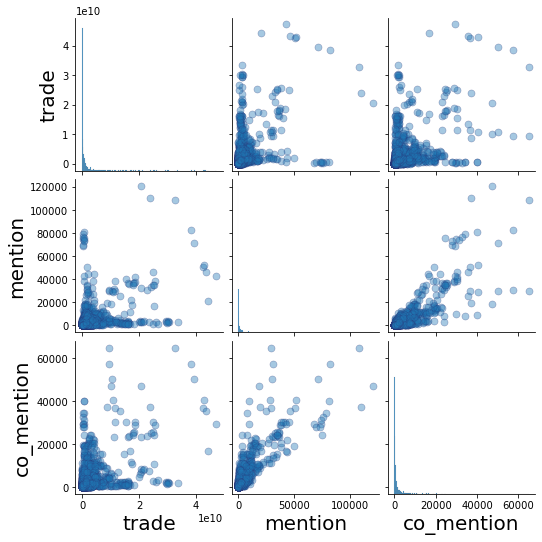

In [345]:
cols = ['trade', 'mention', 'co_mention']

# cols += [f'log_{col}' for col in cols]

pp = sns.pairplot(data = filter_df[cols],
             kind = 'scatter', 
             plot_kws = {"s": 50, 'edgecolor':"#2b3679", 'alpha':0.4}
#              kind='reg', 
            )

font_size=20
N = len(cols)
for i in range(N):
    
    pp.axes[i,0].set_ylabel(cols[i], fontsize=font_size)
    pp.axes[N-1,i].set_xlabel(cols[i], fontsize=font_size)
    
    

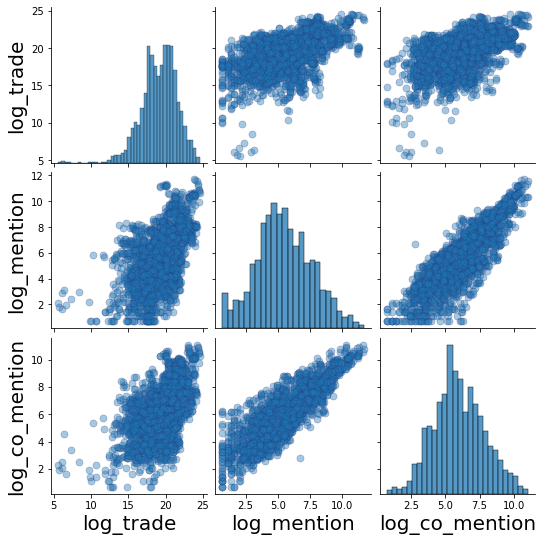

In [347]:
cols = ['trade', 'mention', 'co_mention']
cols = [f'log_{col}' for col in cols]

pp = sns.pairplot(data = filter_df[cols],
             kind = 'scatter', 
             plot_kws = {"s": 50, 'edgecolor':"#2b3679", 'alpha':0.4}
#              kind='reg', 
            )

font_size=20
N = len(cols)
for i in range(N):
    
    pp.axes[i,0].set_ylabel(cols[i], fontsize=font_size)
    pp.axes[N-1,i].set_xlabel(cols[i], fontsize=font_size)

In [365]:
res = collections.defaultdict(dict)

In [379]:
# delta = 1

for delta in range(10):
    
    trade_sdf['pre_time'] = trade_sdf['time'] - delta


    df = pd.merge(trade_sdf, mention_sdf, left_on=['pre_time', 'country', 'import_from'], right_on=['time', 'country', 'mentioned'])
    df = pd.merge(df, mention2_sdf, left_on=['pre_time', 'country', 'import_from'], right_on=['time', 'country', 'co_mentioned'])
    df.rename(columns={'time_x': 'trade_time','time_y': 'mention_time', 'time': 'co_mention_time'}, inplace=True)

    # df.head()

    filter_df = df[ (df['trade']>0) & (df['mention']>0) & (df['co_mention']>0) ]
    # filter_df.shape
    
    x1 = filter_df['trade']
    x2 = filter_df['mention']

    # pearson: use log-transformation: np.log(x)
    res[delta]['pearson'] = stats.pearsonr(x1.map(np.log), x2.map(np.log))[0]

    res[delta]['spearman'] = stats.spearmanr(x1, x2)[0]



In [380]:
res

defaultdict(dict,
            {0: {'pearson': 0.5493192834927547,
              'spearman': 0.5480745469543878},
             1: {'pearson': 0.5490796514225205,
              'spearman': 0.5476588230118022},
             2: {'pearson': 0.552809035810464, 'spearman': 0.5505868347902579},
             3: {'pearson': 0.558401110934646, 'spearman': 0.5581979027081425},
             4: {'pearson': 0.5625509443533641,
              'spearman': 0.5622218120870792},
             5: {'pearson': 0.5554122175044531,
              'spearman': 0.5530784718520073},
             6: {'pearson': 0.5523798461370636,
              'spearman': 0.5458210711740756},
             7: {'pearson': 0.5520456403144124,
              'spearman': 0.5396388761334585},
             8: {'pearson': 0.5641452633916648,
              'spearman': 0.5449516799471597},
             9: {'pearson': 0.5545090729511579,
              'spearman': 0.5361500664885357}})

In [382]:
pd.DataFrame.from_dict(res, orient='index').reset_index().rename(columns={'index': 'delta_time'})

,delta_time,pearson,spearman
0,0,0.549319,0.548075
1,1,0.549080,0.547659
2,2,0.552809,0.550587
3,3,0.558401,0.558198
4,4,0.562551,0.562222
5,5,0.555412,0.553078
6,6,0.552380,0.545821
7,7,0.552046,0.539639
8,8,0.564145,0.544952
9,9,0.554509,0.536150


In [360]:
x1 = filter_df['trade']
x2 = filter_df['mention']

# pearson: use log-transformation: np.log(x)
res[delta]['pearson'] = stats.pearsonr(x1.map(np.log), x2.map(np.log))[0]

res[delta]['spearman'] = stats.spearmanr(x1, x2)[0]

In [361]:
res

defaultdict(dict,
            {1: {'pearson': 0.5490796514225205,
              'spearman': 0.5476588230118022}})

In [359]:
x1.map(np.log)

1       17.888441
2       18.689381
3       17.812541
4       21.800534
5       16.843449
          ...    
4394    19.053689
4395    19.274088
4396    19.617137
4397    20.942587
4398    20.967959
Name: trade, Length: 2538, dtype: float64

In [350]:
x1 = filter_df['trade']
x2 = filter_df['mention']

print(x1.shape)
print(stats.pearsonr(x1, x2))
print(stats.spearmanr(x1, x2))



(2538,)
(0.47563298767673706, 1.9238076257419942e-143)
SpearmanrResult(correlation=0.5476588230118022, pvalue=1.259354288638462e-198)


In [355]:
stats.pearsonr(x1, x2)[0]

0.47563298767673706

In [356]:
stats.spearmanr(x1, x2)[0]

0.5476588230118022

In [339]:
cols = ['trade', 'mention', 'co_mention']
filter_df[cols].corr()

,trade,mention,co_mention
trade,1.000000,0.475633,0.512201
mention,0.475633,1.000000,0.835217
co_mention,0.512201,0.835217,1.000000


In [341]:
filter_df.head()

,trade_time,country,import_from,trade,pre_time,mention_time,mentioned,mention,co_mention_time,co_mentioned,co_mention
1,202002,Australia,Brunei,58728829,202001,202001,Brunei,3,202001,Brunei,27
2,202002,Australia,Canada,130826244,202001,202001,Canada,1294,202001,Canada,2145
3,202002,Australia,Chile,54436283,202001,202001,Chile,425,202001,Chile,628
4,202002,Australia,China,2936647278,202001,202001,China,6817,202001,China,5129
5,202002,Australia,Hong Kong,20654608,202001,202001,Hong Kong,62,202001,Hong Kong,235


In [342]:
for col in cols:
    filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))

cols += [f'log_{col}' for col in cols]


C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\2537828295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))
C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\2537828295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[f'log_{col}'] = filter_df[col].map(lambda x: np.log(x+1))
C:\Users\yafeizhang\AppData\Local\Temp\ipykernel_35376\2537828295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [343]:
filter_df[cols].corr()

,trade,mention,co_mention,log_trade,log_mention,log_co_mention
trade,1.000000,0.475633,0.512201,0.530272,0.422329,0.394830
mention,0.475633,1.000000,0.835217,0.294930,0.530057,0.489661
co_mention,0.512201,0.835217,1.000000,0.360802,0.575814,0.627132
log_trade,0.530272,0.294930,0.360802,1.000000,0.548858,0.540153
log_mention,0.422329,0.530057,0.575814,0.548858,1.000000,0.853873
log_co_mention,0.394830,0.489661,0.627132,0.540153,0.853873,1.000000
